<a href="https://colab.research.google.com/github/saurabhshinkar/Play_Store_App_Review_Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Importing Libraries**

In [162]:
#Import all library that will be used in entire project
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

**Mount Drive**

In [163]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
# Importing Dataset
File_path='/content/drive/MyDrive/Capstone Projects/EDA project/'
play_store_data= pd.read_csv(File_path + 'Play Store Data.csv')
user_reviews_data=pd.read_csv(File_path + 'User Reviews.csv')


In [165]:
# First Look 

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [166]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [167]:
user_reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [168]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**Let's drive into the play store data**

In [169]:
play_store_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Handling Missing Data**

In [170]:
# Missing Value Count Function
def show_missing():
    missing = play_store_data.columns[play_store_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(play_store_data)*100,2))

Missing Data Count
Rating            1474
Current Ver       8   
Android Ver       3   
Type              1   
Content Rating    1   
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Rating            13.60
Current Ver       0.07 
Android Ver       0.03 
Type              0.01 
Content Rating    0.01 
dtype: float64


**Rating**

In [171]:
play_store_data[play_store_data['Rating'].isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


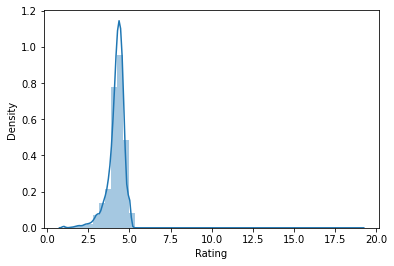

In [172]:
sns.distplot(play_store_data.Rating.dropna())

In [174]:
play_store_data.Rating.dropna().median()

4.3

In [175]:
#Fill NaN Values in Rating Column with Median

play_store_data['Rating'] = play_store_data['Rating'].fillna(play_store_data['Rating'].median())

In [176]:
# Missing Value Count Function
def show_missing():
    missing = play_store_data.columns[play_store_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(play_store_data)*100,2))

Missing Data Count
Current Ver       8
Android Ver       3
Type              1
Content Rating    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Current Ver       0.07
Android Ver       0.03
Type              0.01
Content Rating    0.01
dtype: float64


In [177]:
#Dropping null as they are now negligible 
play_store_data.dropna(inplace=True)

In [178]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


**Cleaning Data And Making It In Proper Format**

**App**

In [114]:
play_store_data['App'].value_counts().head().reset_index()

,index,App
0,ROBLOX,9
1,"CBS Sports App - Scores, News, Stats & Watch Live",8
2,8 Ball Pool,7
3,Duolingo: Learn Languages Free,7
4,Candy Crush Saga,7


In [116]:
play_store_data[play_store_data['App']=="ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [180]:
#As all rows have same data, only a slight difference in Reviews, we will delete duplicates 
play_store_data.drop_duplicates(subset=['App'],inplace=True)

In [181]:
play_store_data[play_store_data['App']=="ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


**Reviews**

In [182]:
type(play_store_data['Reviews'].iloc[0])

str

In [183]:
#converting Reviews type into integer
play_store_data['Reviews'] = pd.to_numeric(play_store_data['Reviews'])

In [184]:
type(play_store_data['Reviews'].iloc[0])

numpy.int64

**Size**

In [185]:
play_store_data['Size'].value_counts().head()

Varies with device    1226
12M                   181 
11M                   181 
13M                   177 
14M                   176 
Name: Size, dtype: int64

In [186]:
play_store_data['Size'].value_counts().tail()

721k    1
430k    1
429k    1
200k    1
619k    1
Name: Size, dtype: int64

In [187]:
#Impute nulls inplace of Varies with device 
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.replace('Varies with device', 'NaN'))

In [188]:
#removing M and k from values, also coverting KB into MB 
play_store_data['Size'] =play_store_data['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x )
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(x.replace('k', ''))/1000 if 'k' in str(x) else x)

In [189]:
play_store_data['Size'] = play_store_data['Size'].astype(float)

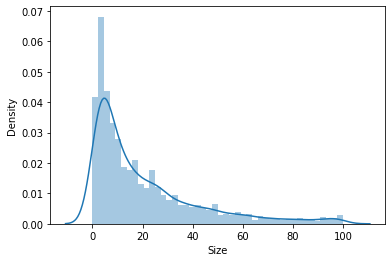

In [190]:
sns.distplot(play_store_data.Size.dropna())

In [191]:
play_store_data.Size.dropna().median()

12.0

In [192]:
#Fill NaN Values in Size Column with Median
play_store_data['Size'] = play_store_data['Size'].fillna(play_store_data['Size'].median())

In [193]:
play_store_data['Size'].isnull().sum()

0

**Installs**

In [194]:
play_store_data['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+       937 
1,000+            886 
100+              709 
5,000,000+        607 
500,000+          504 
50,000+           468 
5,000+            467 
10+               384 
500+              328 
50+               204 
50,000,000+       202 
100,000,000+      188 
5+                82  
1+                67  
500,000,000+      24  
1,000,000,000+    20  
0+                14  
Name: Installs, dtype: int64

In [195]:
#Removing + and ,
play_store_data['Installs']=play_store_data['Installs'].apply(lambda x:x.replace('+','') if '+' in str(x) else x) 
play_store_data['Installs']=play_store_data['Installs'].apply(lambda x:x.replace(',','') if ',' in str(x) else x) 

In [196]:
type(play_store_data.Installs.iloc[0])

str

In [197]:
#converting Installs type into integer
play_store_data['Installs'] = pd.to_numeric(play_store_data['Installs'])

In [198]:
type(play_store_data.Installs.iloc[0])

numpy.int64

**Price**

In [199]:
play_store_data['Price'].value_counts().head()

0        8895
$0.99    143 
$2.99    124 
$1.99    73  
$4.99    70  
Name: Price, dtype: int64

In [200]:
#removing $ 
play_store_data['Price']=play_store_data['Price'].apply(lambda x:x.replace('$','') if '$' in str(x) else x)

In [201]:
type(play_store_data.Price.iloc[0])

str

In [202]:
#converting into float
play_store_data['Price']=play_store_data['Price'].astype(float)

In [203]:
type(play_store_data.Price.iloc[0])

numpy.float64

In [204]:
play_store_data.isna().any().any()

False

In [205]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


Now play store data is cleaned and ready to use

In [209]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**`Analyzing Each Feature Separately**

**Category**

In [210]:
len(play_store_data['Category'].unique())

33

In [220]:
category_count=play_store_data['Category'].value_counts().reset_index()
category_count

,index,Category
0,FAMILY,1828
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395
5,PRODUCTIVITY,374
6,PERSONALIZATION,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


**Top 10 categories**

In [216]:
Top10_categories=play_store_data['Category'].value_counts().reset_index().head(10)
Top10_categories.rename(columns={'index':'Category','Category':'Count'},inplace=True)
Top10_categories

,Category,Count
0,FAMILY,1828
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395
5,PRODUCTIVITY,374
6,PERSONALIZATION,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


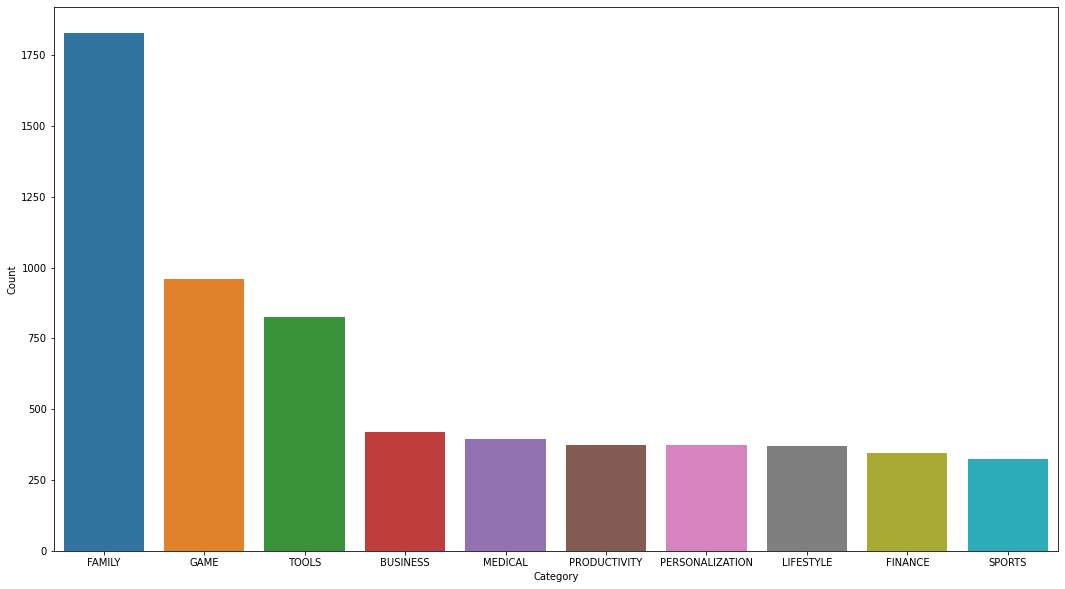

In [231]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.barplot(Top10_categories['Category'],Top10_categories['Count'])

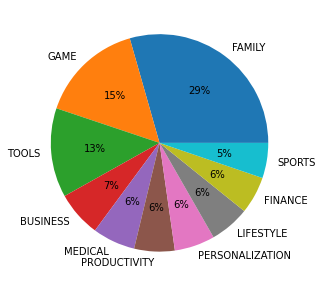

In [287]:
plt.pie(Top10_categories['Count'],labels=Top10_categories['Category'],autopct='%.0f%%')
plt.show()

Apps of Family category are the most. They are almost 30%.

**Rating**

In [233]:
play_store_data['Rating'].describe()

count    9648.000000
mean     4.192465   
std      0.496552   
min      1.000000   
25%      4.000000   
50%      4.300000   
75%      4.500000   
max      5.000000   
Name: Rating, dtype: float64

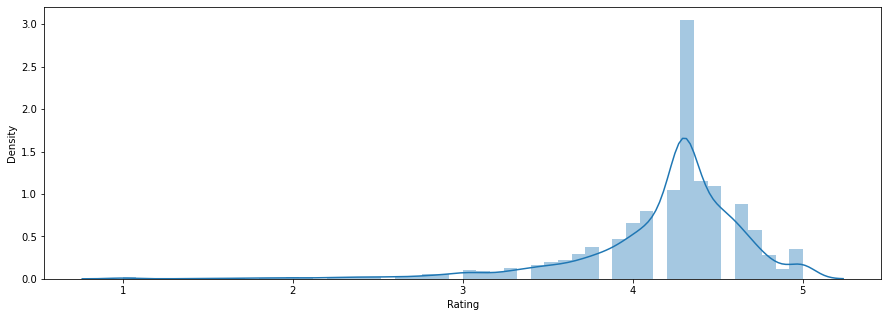

In [237]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(play_store_data['Rating'])

Data is negatively skewed with mean rating of 4.19




**Reviews**

In [241]:
#play_store_data['Reviews'].describe()

In [240]:
#plt.rcParams['figure.figsize'] = (15, 5)
#sns.distplot(play_store_data['Reviews'])

**Size**

In [242]:
play_store_data['Size'].describe()

count    9648.000000
mean     19.344761  
std      20.590271  
min      0.008500   
25%      5.300000   
50%      12.000000  
75%      25.000000  
max      100.000000 
Name: Size, dtype: float64

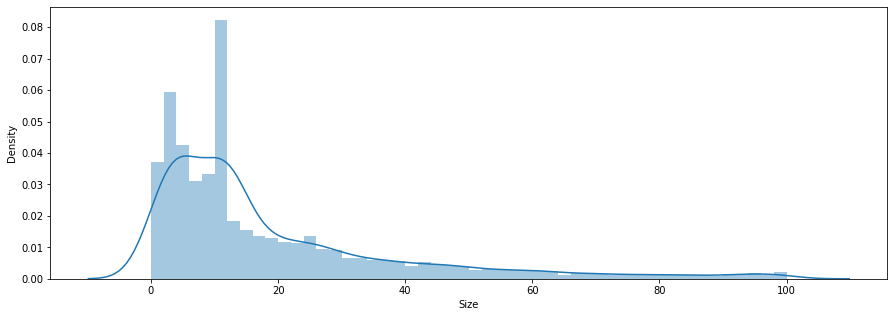

In [243]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(play_store_data['Size'])

Data is positively skewed with mean size of 19 MB and max size of 100 MB

**Installs**

In [244]:
#play_store_data['Installs'].describe()

count    9.648000e+03
mean     7.786211e+06
std      5.378830e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

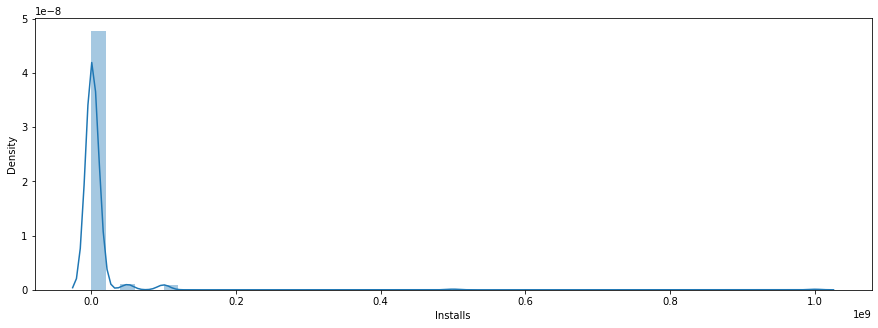

In [245]:
#plt.rcParams['figure.figsize'] = (15, 5)
#sns.distplot(play_store_data['Installs'])

**Price**

In [246]:
play_store_data['Price'].describe()

count    9648.000000
mean     1.100193   
std      16.861727  
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      0.000000   
max      400.000000 
Name: Price, dtype: float64

In [262]:
price_count= play_store_data['Price'].value_counts().reset_index()
price_count.rename(columns={'index':'Price','Price':'Count'},inplace=True)
price_count.head()

,Price,Count
0,0.00,8895
1,0.99,143
2,2.99,124
3,1.99,73
4,4.99,70


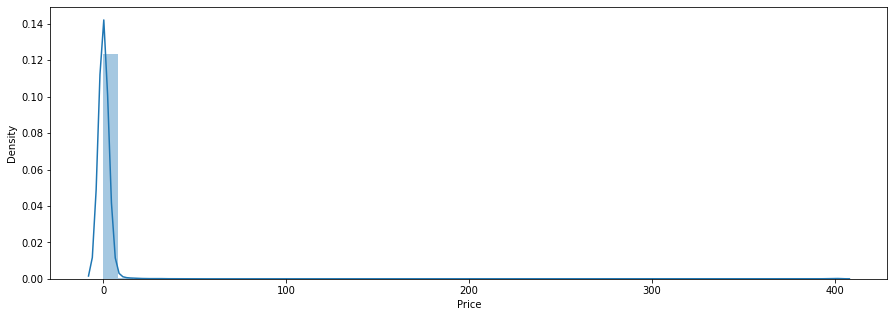

In [247]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(play_store_data['Price'])

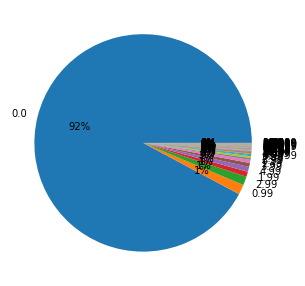

In [286]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.pie(price_count['Count'],labels=price_count['Price'],autopct='%.0f%%')
plt.show()




*  Data is positively skewed with mean price of 1, max price of 400.
*  More than 90% apps are free.



**Genres**

In [278]:
genres_count=play_store_data['Genres'].value_counts().reset_index()
genres_count.rename(columns={'index':'Genres','Genres':'count'},inplace=True)
genres_count

,Genres,count
0,Tools,824
1,Entertainment,560
2,Education,509
3,Business,420
4,Medical,395
5,Productivity,374
6,Personalization,374
7,Lifestyle,368
8,Finance,345
9,Sports,331


In [282]:
Top_15_genres=genres_count.head(15)
Top_15_genres

,Genres,count
0,Tools,824
1,Entertainment,560
2,Education,509
3,Business,420
4,Medical,395
5,Productivity,374
6,Personalization,374
7,Lifestyle,368
8,Finance,345
9,Sports,331


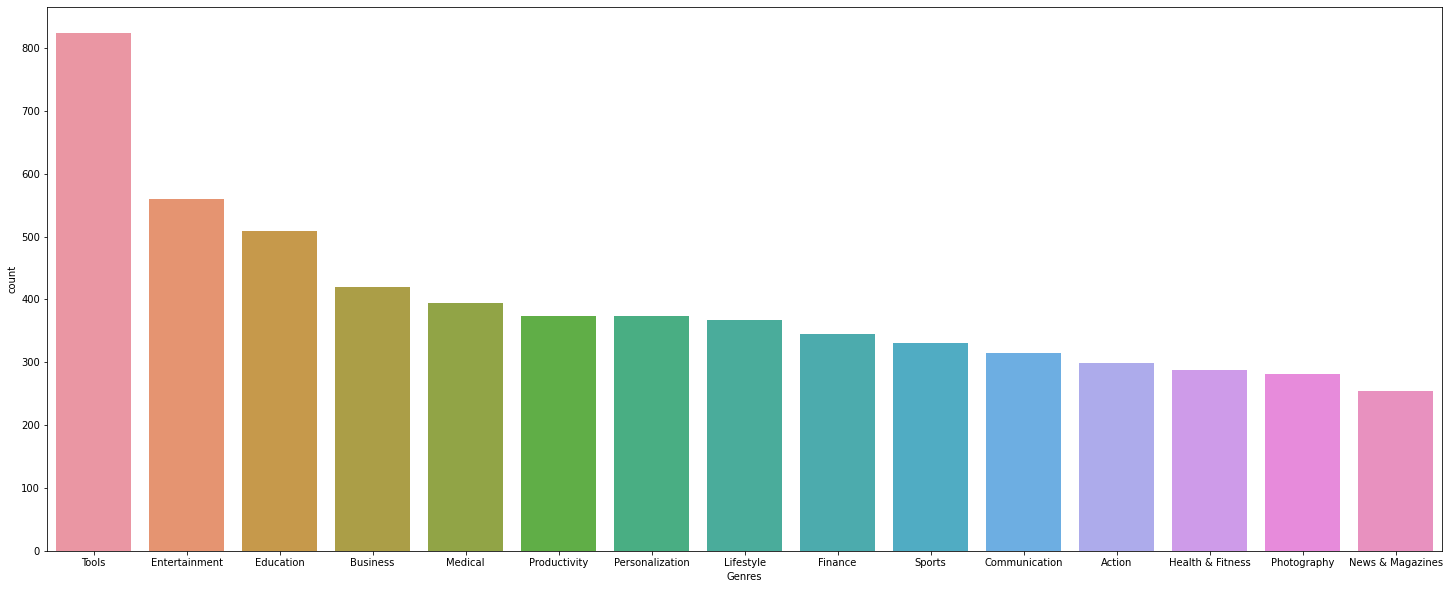

In [283]:
plt.rcParams['figure.figsize'] = (25, 10)
sns.barplot(Top_15_genres['Genres'],Top_15_genres['count'])

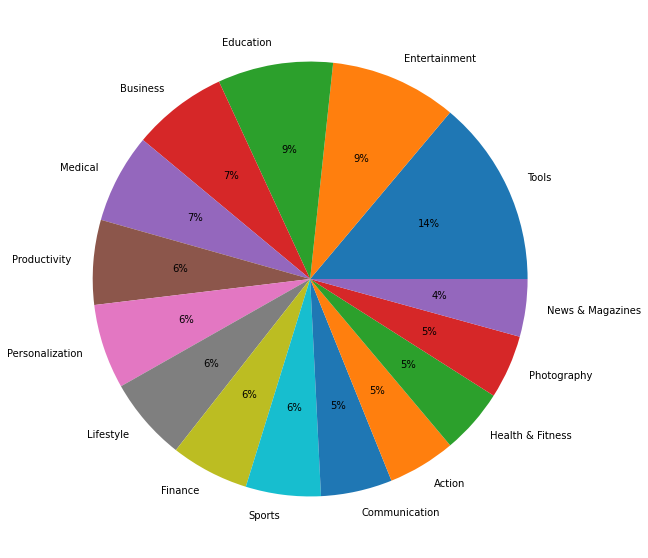

In [285]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.pie(Top_15_genres['count'],labels=Top_15_genres['Genres'],autopct='%.0f%%')
plt.show()

In [288]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [289]:
#until 4;11pm, 5august


In [56]:
genres_installs = df.groupby('Genres')['Installs'].sum().reset_index()

In [57]:
genres_installs.head()

,Genres,Installs
0,Action,3483039190
1,Action;Action & Adventure,53020500
2,Adventure,296695320
3,Adventure;Action & Adventure,106150000
4,Adventure;Brain Games,100000


In [58]:
top_genres_installs = pd.merge(top_genres, genres_installs,how='inner',on='Genres')

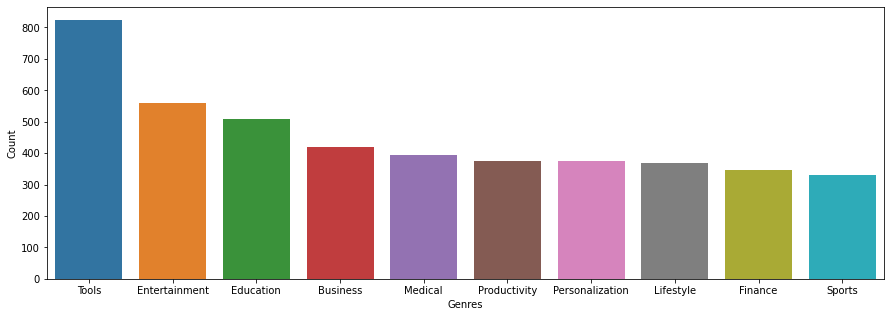

In [59]:

plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(top_genres_installs['Genres'], top_genres_installs['Count'])

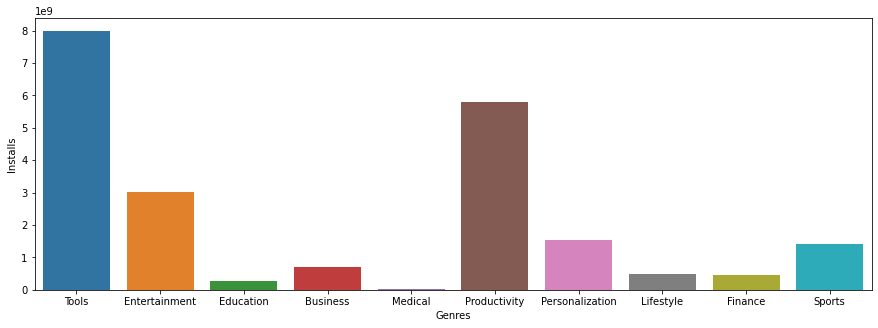

In [60]:
sns.barplot(top_genres_installs['Genres'], top_genres_installs['Installs'])

In [61]:
top_categories = df['Category'].value_counts().reset_index().head(20)

In [62]:
top_categories.rename(columns={'Category':'Count','index':'Category'},inplace=True)

In [63]:
top_categories

,Category,Count
0,FAMILY,1828
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395
5,PRODUCTIVITY,374
6,PERSONALIZATION,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [64]:
category_installs = df.groupby('Category')['Installs'].sum().reset_index()

In [65]:
category_installs

,Category,Installs
0,ART_AND_DESIGN,114333100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1665968576
4,BUSINESS,697164865
5,COMICS,44981150
6,COMMUNICATION,11038276251
7,DATING,140926107
8,EDUCATION,352952000
9,ENTERTAINMENT,2113660000


In [66]:
top_category_installs = pd.merge(top_categories, category_installs,how='inner',on='Category').head(15)

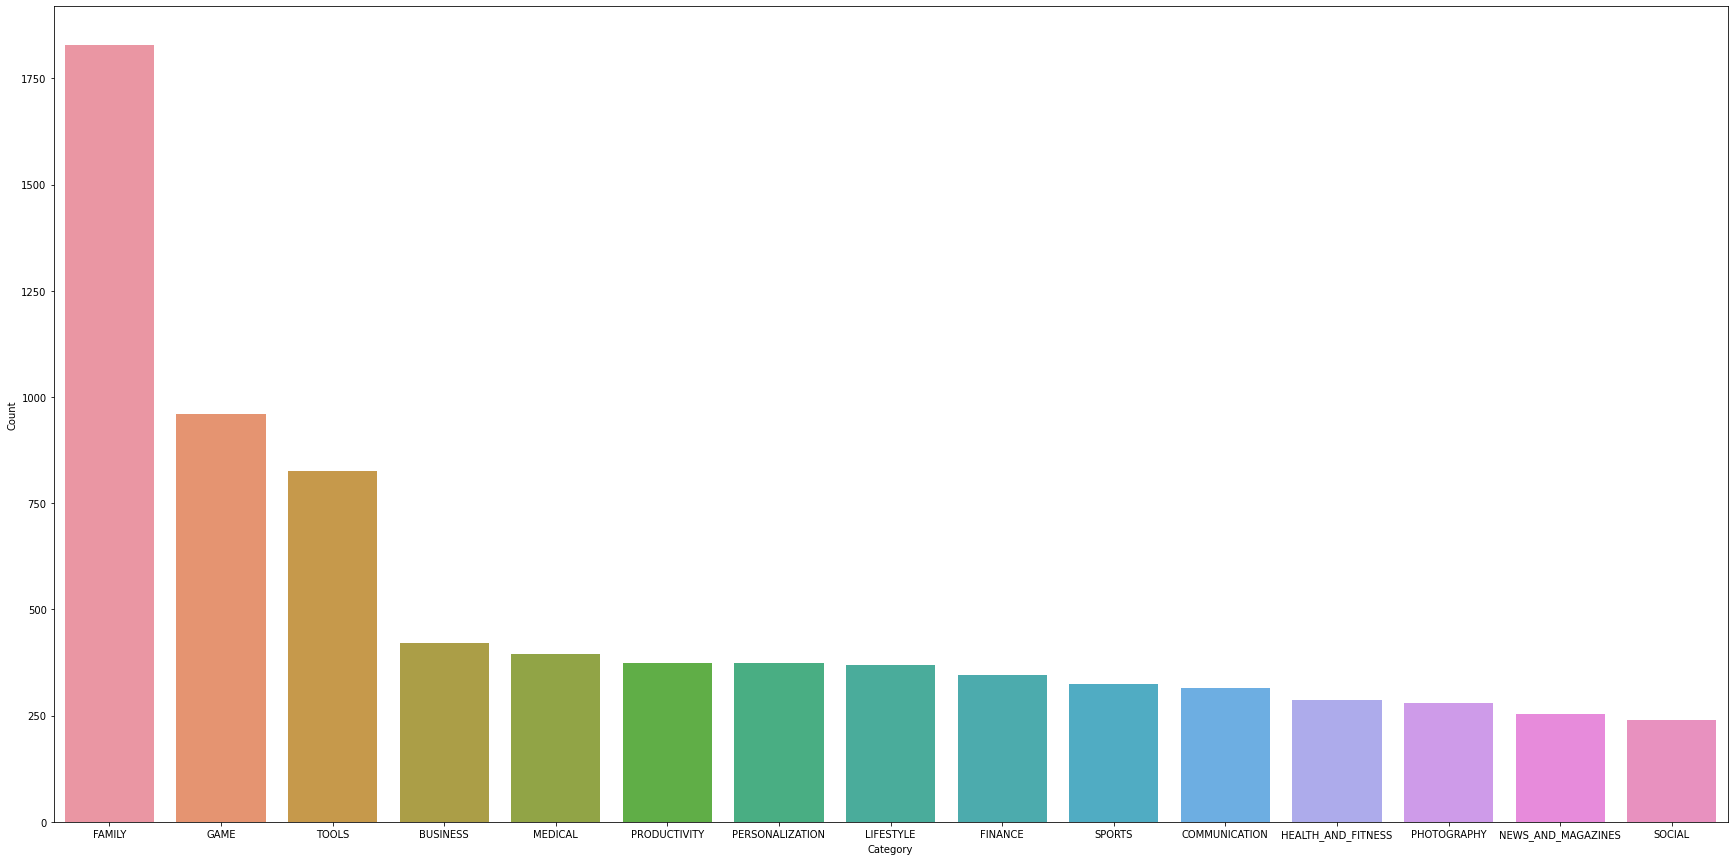

In [67]:
plt.rcParams['figure.figsize'] = (30, 15)
sns.barplot(top_category_installs['Category'], top_category_installs['Count'])

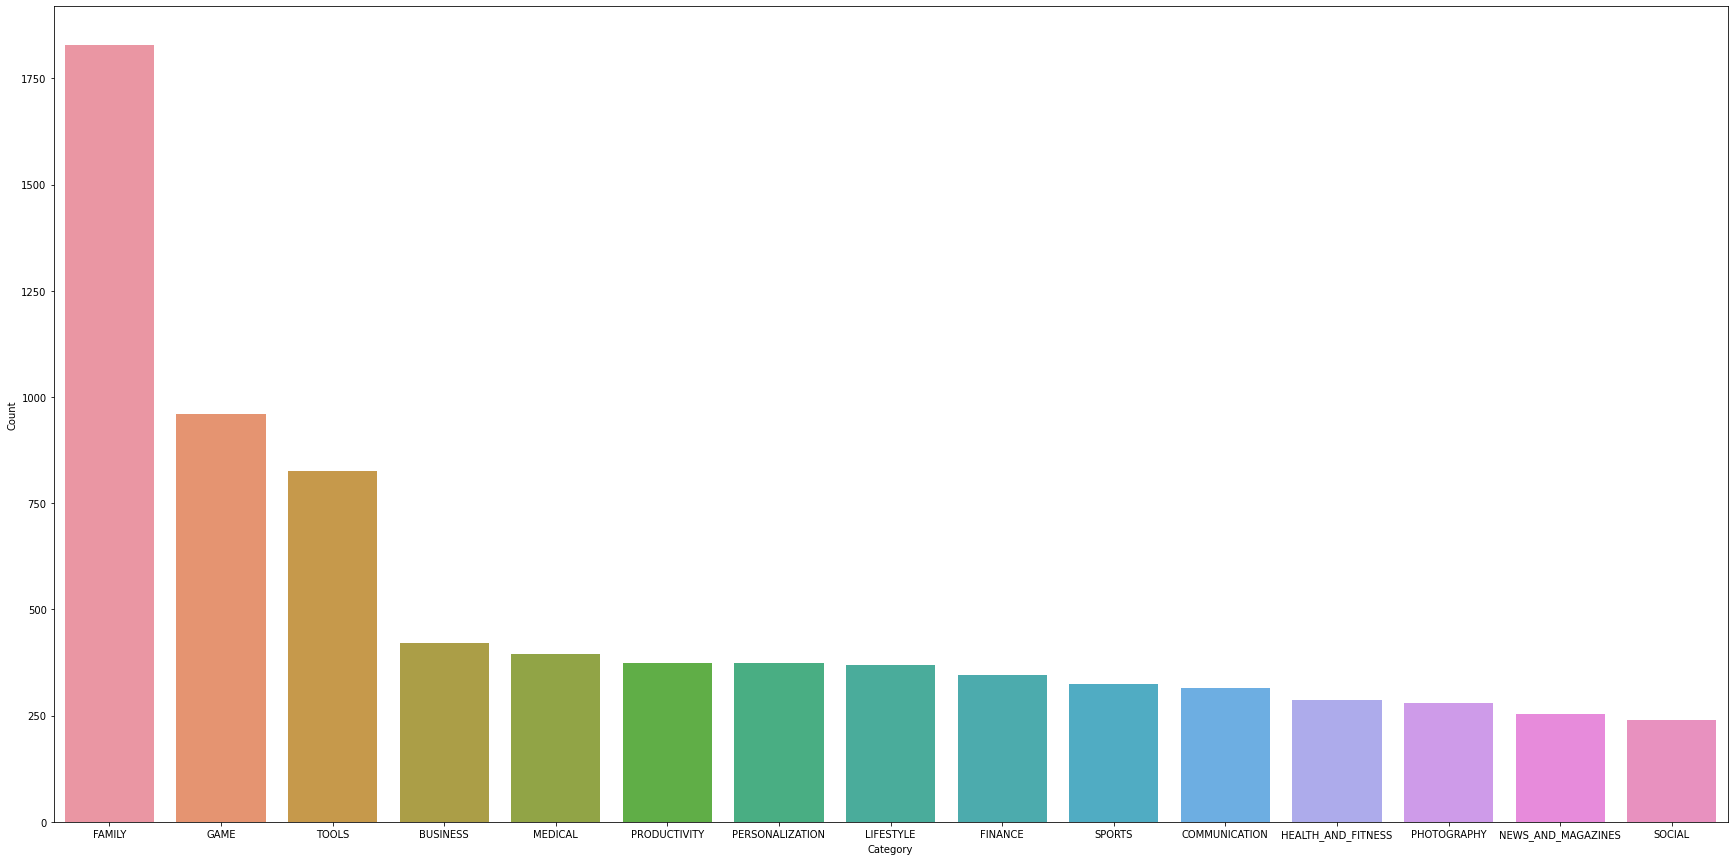

In [68]:
sns.barplot(top_category_installs['Category'], top_category_installs['Count'])

In [69]:
genres_ratings_play_store_data = df.groupby(['Genres'])[['Rating']].mean()
genres_ratings_play_store_data.head()

,Rating
Genres,
Action,4.246154
Action;Action & Adventure,4.316667
Adventure,4.182192
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000


In [70]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_play_store_data , on='Genres')
genres_installs_ratings

,Genres,Count,Installs,Rating
0,Tools,824,7991271905,4.072937
1,Entertainment,560,3014704684,4.117857
2,Education,509,258410048,4.292731
3,Business,420,697164865,4.173810
4,Medical,395,38193177,4.202025
5,Productivity,374,5793091369,4.206150
6,Personalization,374,1532483782,4.324866
7,Lifestyle,368,493823539,4.131793
8,Finance,345,455348734,4.138551
9,Sports,331,1412474498,4.238369


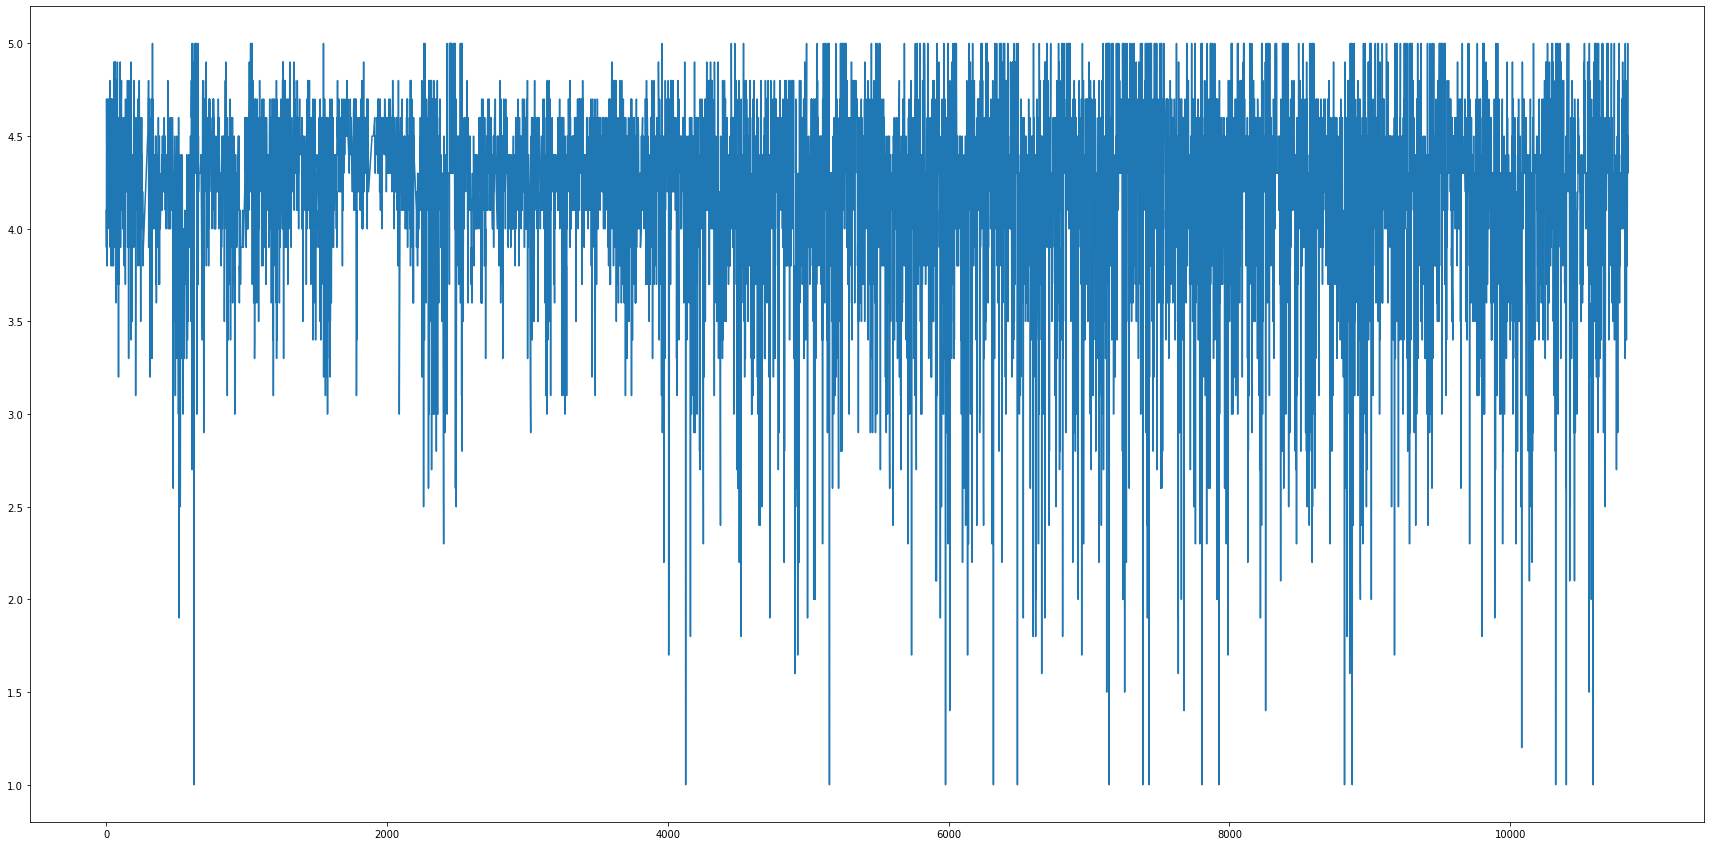

In [71]:
df['Rating'].plot ()

In [72]:
genres_ratings_play_store_data['Rating'].describe()

count    118.000000
mean     4.258810  
std      0.169903  
min      3.800000  
25%      4.155364  
50%      4.260948  
75%      4.339783  
max      4.800000  
Name: Rating, dtype: float64

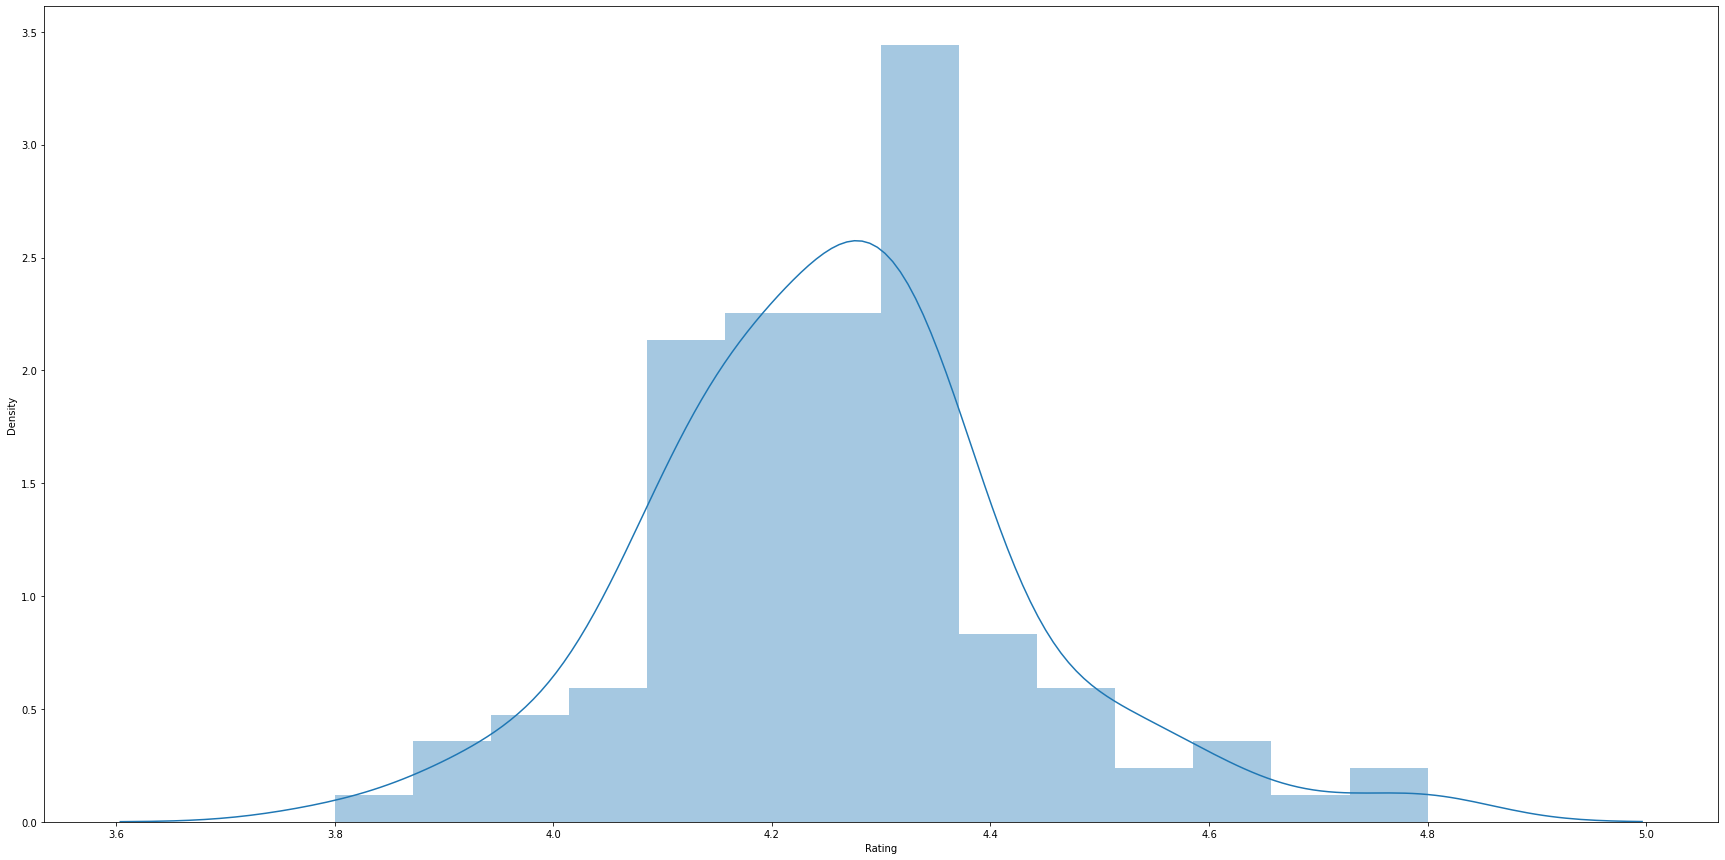

In [73]:
sns.distplot(genres_ratings_play_store_data['Rating'])

In [74]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [75]:
genres_installs_ratings

,Genres,Count,Installs,Rating
6,Personalization,374,1532483782,4.324866
2,Education,509,258410048,4.292731
9,Sports,331,1412474498,4.238369
5,Productivity,374,5793091369,4.206150
4,Medical,395,38193177,4.202025
3,Business,420,697164865,4.173810
8,Finance,345,455348734,4.138551
7,Lifestyle,368,493823539,4.131793
1,Entertainment,560,3014704684,4.117857
0,Tools,824,7991271905,4.072937


In [76]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]

In [77]:
highest_rated_genres

,Genres,Count,Installs,Rating
6,Personalization,374,1532483782,4.324866
2,Education,509,258410048,4.292731
9,Sports,331,1412474498,4.238369
5,Productivity,374,5793091369,4.206150
4,Medical,395,38193177,4.202025
3,Business,420,697164865,4.173810
8,Finance,345,455348734,4.138551
7,Lifestyle,368,493823539,4.131793
1,Entertainment,560,3014704684,4.117857
0,Tools,824,7991271905,4.072937


In [78]:
#lowest_rated_genres..do later as data needs to taken well

In [79]:
app_count = df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
app_count

,Category,Type,Count
0,ART_AND_DESIGN,Free,60
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
5,BOOKS_AND_REFERENCE,Free,193
6,BOOKS_AND_REFERENCE,Paid,28
7,BUSINESS,Free,408
8,BUSINESS,Paid,12
9,COMICS,Free,56


In [80]:
#pivot part not done,that graph can be draw using upstack

In [81]:
categoty_type_installs = df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs

,Category,Type,Installs
0,ART_AND_DESIGN,Free,114317100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53080061
3,AUTO_AND_VEHICLES,Paid,50150
4,BEAUTY,Free,27197050
5,BOOKS_AND_REFERENCE,Free,1665945260
6,BOOKS_AND_REFERENCE,Paid,23316
7,BUSINESS,Free,696952090
8,BUSINESS,Paid,212775
9,COMICS,Free,44981150


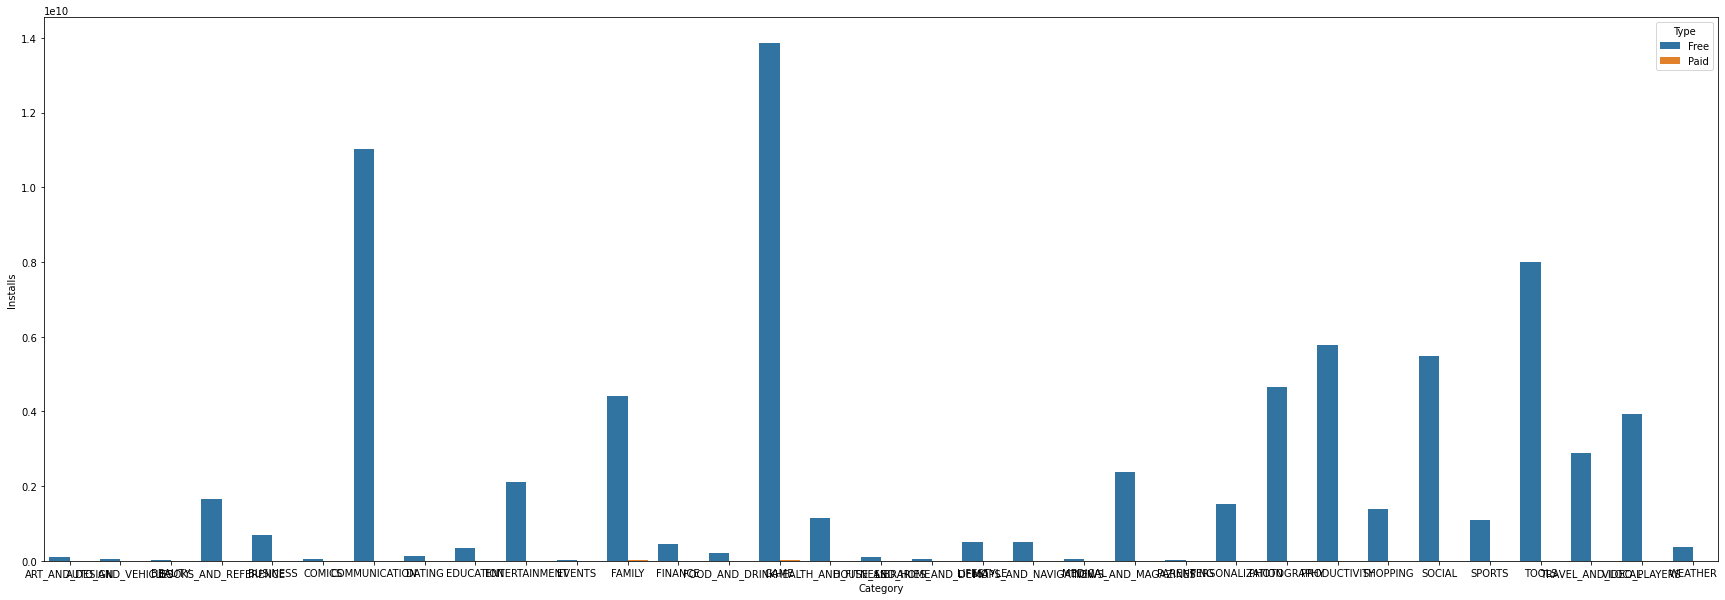

In [82]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.barplot(categoty_type_installs['Category'],categoty_type_installs['Installs'],hue=categoty_type_installs['Type']);
plt.show()

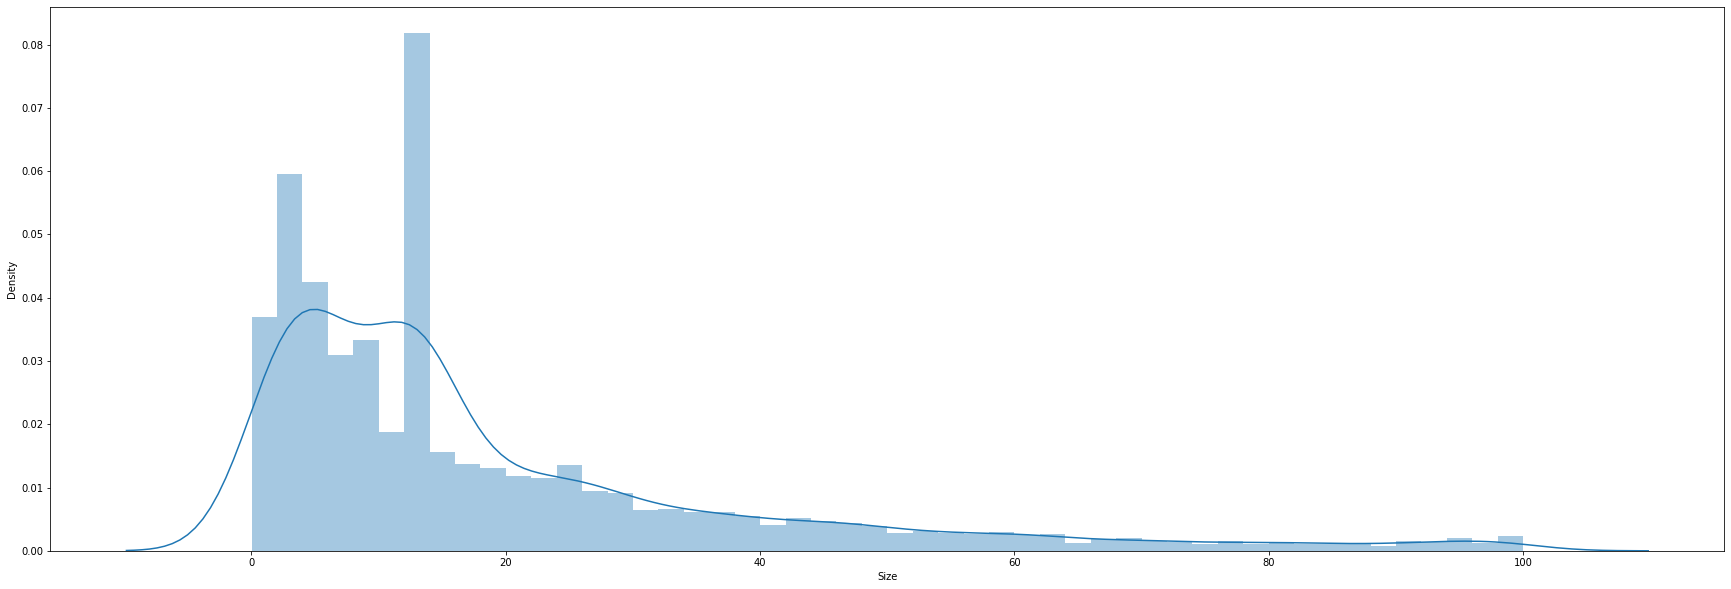

In [83]:
sns.distplot(df['Size'])

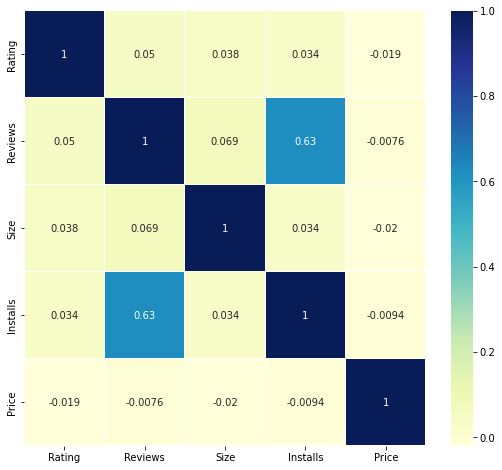

In [84]:
corrmat = df.corr()  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax,cmap ="YlGnBu",annot = True, linewidths = 0.1)

In [85]:
df.Category.value_counts()

FAMILY                 1828
GAME                   959 
TOOLS                  825 
BUSINESS               420 
MEDICAL                395 
PRODUCTIVITY           374 
PERSONALIZATION        374 
LIFESTYLE              369 
FINANCE                345 
SPORTS                 325 
COMMUNICATION          315 
HEALTH_AND_FITNESS     288 
PHOTOGRAPHY            281 
NEWS_AND_MAGAZINES     254 
SOCIAL                 239 
BOOKS_AND_REFERENCE    221 
TRAVEL_AND_LOCAL       219 
SHOPPING               202 
DATING                 171 
VIDEO_PLAYERS          163 
MAPS_AND_NAVIGATION    131 
EDUCATION              119 
FOOD_AND_DRINK         112 
ENTERTAINMENT          102 
AUTO_AND_VEHICLES      85  
LIBRARIES_AND_DEMO     83  
WEATHER                79  
HOUSE_AND_HOME         74  
EVENTS                 64  
ART_AND_DESIGN         63  
PARENTING              60  
COMICS                 56  
BEAUTY                 53  
Name: Category, dtype: int64

In [86]:
#new data merge now

In [87]:
user_reviews_df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/EDA project/User Reviews.csv')

In [88]:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [89]:
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [90]:
user_reviews_df.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'] , inplace = True)

In [91]:
user_reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [92]:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [101]:
len(user_reviews_df['App'].unique())

865

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [94]:
merged_df = df.merge(user_reviews_df, on="App")

In [95]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 35928
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   Category                35929 non-null  object 
 2   Rating                  35929 non-null  float64
 3   Reviews                 35929 non-null  int64  
 4   Size                    35929 non-null  float64
 5   Installs                35929 non-null  int64  
 6   Type                    35929 non-null  object 
 7   Price                   35929 non-null  float64
 8   Content Rating          35929 non-null  object 
 9   Genres                  35929 non-null  object 
 10  Last Updated            35929 non-null  object 
 11  Current Ver             35929 non-null  object 
 12  Android Ver             35929 non-null  object 
 13  Translated_Review       35929 non-null  object 
 14  Sentiment               35929 non-null

In [96]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [97]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,"A kid's excessive ads. The types ads allowed app, let alone kids",Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


How size impacting no of installs remain